In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataprocessed.csv')
print(df.shape)

(120915, 10)


In [29]:
df_countries=df[['country','price','points']]
grb_countries=df_countries.groupby('country')['price','points'].mean().reset_index()

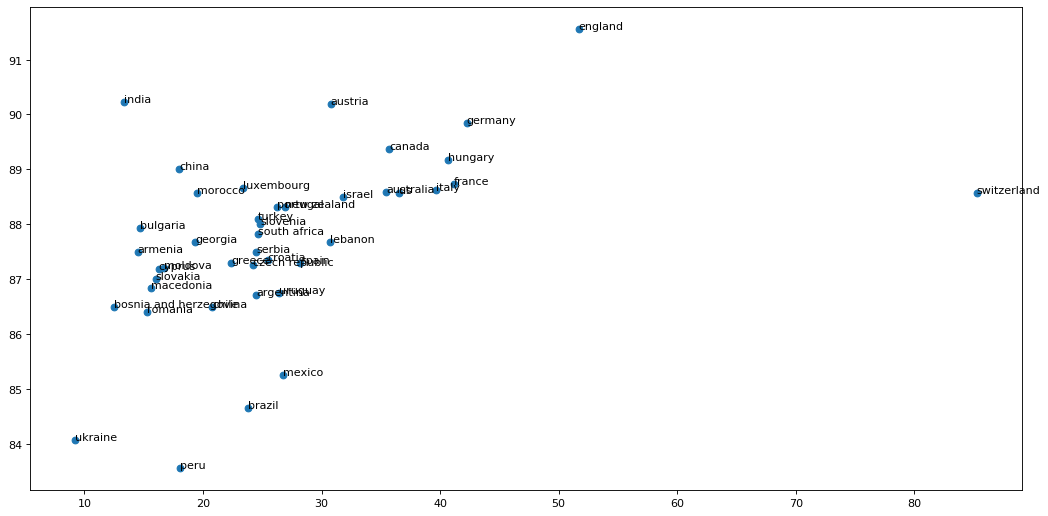

In [30]:
plt.figure(figsize=(16,8), dpi=80)
plt.scatter(grb_countries['price'], grb_countries['points'])

for i, txt in enumerate(grb_countries['country']):
    plt.annotate(txt, (grb_countries['price'][i], grb_countries['points'][i]))

In [32]:
df_variety=df[['country','price','points','variety','province']]
grb_variety=df_variety.groupby('variety')
grb_country=df_variety.groupby('country')

In [25]:
for name,group in grb_variety:
    print(name)
#     max_price=group.price.max()
#     min_price=group.price.min()
#     print(group[group.price==max_price])
#     print(group[group.price==min_price])
    grb_country=group.groupby('country')
    for n,g in grb_country:
        print(n)
        print(g)

abouriou
france
       country  price  points   variety          province
91364   france   15.0      87  abouriou  southwest france
120840  france   15.0      91  abouriou  southwest france
us
      country  price  points   variety    province
42124      us   75.0      85  abouriou  california
agiorgitiko
greece
       country  price  points      variety province
2026    greece   15.0      90  agiorgitiko    nemea
4464    greece   18.0      85  agiorgitiko    nemea
4540    greece   25.0      87  agiorgitiko    nemea
8700    greece   22.0      89  agiorgitiko    nemea
9759    greece   25.0      90  agiorgitiko    nemea
...        ...    ...     ...          ...      ...
108231  greece   20.0      85  agiorgitiko   attica
112726  greece   15.0      90  agiorgitiko    nemea
113228  greece   17.0      84  agiorgitiko    nemea
114264  greece   22.0      89  agiorgitiko    nemea
115779  greece   13.0      83  agiorgitiko    nemea

[63 rows x 5 columns]
aglianico
italy
       country  price  

120178      us   19.0      84  alvarinho  california
alvarinho-chardonnay
portugal
         country  price  points               variety province
67180   portugal   10.0      88  alvarinho-chardonnay   lisboa
83667   portugal    9.0      87  alvarinho-chardonnay   lisboa
90585   portugal   11.0      87  alvarinho-chardonnay   lisboa
119204  portugal   15.0      85  alvarinho-chardonnay   lisboa
ansonica
italy
      country  price  points   variety province
82106   italy   30.0      86  ansonica  tuscany
97654   italy   22.0      87  ansonica  tuscany
antão vaz
portugal
         country  price  points    variety              province
704     portugal   12.0      85  antão vaz              alentejo
2707    portugal   12.0      86  antão vaz            alentejano
20375   portugal   28.0      90  antão vaz            alentejano
24317   portugal   30.0      88  antão vaz  península de setúbal
25768   portugal   20.0      90  antão vaz            alentejano
39797   portugal   15.0      89  a

portugal
         country  price  points variety         province
1767    portugal   70.0      93    baga           beiras
5960    portugal   12.0      86    baga  beira atlantico
24313   portugal   35.0      88    baga         bairrada
33682   portugal   14.0      88    baga         bairrada
36800   portugal   60.0      93    baga  beira atlantico
42260   portugal   16.0      90    baga         bairrada
46790   portugal   42.0      92    baga         bairrada
51289   portugal   45.0      92    baga         bairrada
57929   portugal   23.0      88    baga         bairrada
69733   portugal   80.0      88    baga         bairrada
77289   portugal   30.0      91    baga         bairrada
80309   portugal   28.0      90    baga         bairrada
81909   portugal   38.0      90    baga       alentejano
83031   portugal   80.0      93    baga         bairrada
84003   portugal    9.0      88    baga         bairrada
84949   portugal   20.0      91    baga         bairrada
91264   portugal   30.

120137  australia   29.0      87  bordeaux-style red blend  western australia
austria
       country  price  points                   variety    province
42161  austria   43.0      91  bordeaux-style red blend  burgenland
86878  austria   30.0      90  bordeaux-style red blend      vienna
brazil
      country  price  points                   variety        province
13675  brazil   10.0      82  bordeaux-style red blend    serra gaúcha
96788  brazil   35.0      86  bordeaux-style red blend  santa catarina
bulgaria
        country  price  points                   variety         province
33299  bulgaria   30.0      91  bordeaux-style red blend  thracian valley
96066  bulgaria   25.0      91  bordeaux-style red blend  thracian valley
canada
       country  price  points                   variety          province
7238    canada   30.0      92  bordeaux-style red blend  british columbia
9967    canada   60.0      92  bordeaux-style red blend  british columbia
11292   canada  120.0      91 

       country  price  points         variety province
102293   china   18.0      89  cabernet blend    china
france
      country  price  points         variety          province
80245  france   13.0      84  cabernet blend  southwest france
greece
      country  price  points         variety province
22552  greece   30.0      85  cabernet blend   attica
68337  greece   30.0      85  cabernet blend   attica
hungary
        country  price  points         variety province
116240  hungary   78.0      89  cabernet blend  villány
israel
       country  price  points         variety      province
20526   israel   65.0      87  cabernet blend  judean hills
104866  israel   65.0      87  cabernet blend  judean hills
italy
      country  price  points         variety           province
28631   italy   84.0      87  cabernet blend            tuscany
50748   italy   40.0      90  cabernet blend            tuscany
69278   italy   16.0      88  cabernet blend  sicily & sardinia
mexico
      countr

argentina
         country  price  points                variety          province
33350  argentina   38.0      91  cabernet franc-malbec  mendoza province
77302  argentina   38.0      91  cabernet franc-malbec  mendoza province
85690  argentina   38.0      91  cabernet franc-malbec  mendoza province
96070  argentina  120.0      91  cabernet franc-malbec  mendoza province
cabernet franc-merlot
austria
       country  price  points                variety          province
79544  austria   60.0      92  cabernet franc-merlot  niederösterreich
us
       country  price  points                variety    province
4580        us   40.0      91  cabernet franc-merlot      oregon
8179        us   36.0      89  cabernet franc-merlot  california
13595       us   30.0      90  cabernet franc-merlot    new york
20130       us   45.0      84  cabernet franc-merlot  california
22060       us   45.0      89  cabernet franc-merlot    michigan
24646       us   39.0      86  cabernet franc-merlot  califo

[764 rows x 5 columns]
france
       country  price  points             variety              province
989     france   12.0      85  cabernet sauvignon  languedoc-roussillon
2549    france   10.0      86  cabernet sauvignon  languedoc-roussillon
5382    france   10.0      83  cabernet sauvignon          france other
5386    france    5.0      83  cabernet sauvignon          france other
5401    france   12.0      83  cabernet sauvignon          france other
5964    france   10.0      85  cabernet sauvignon  languedoc-roussillon
5977    france    9.0      85  cabernet sauvignon  languedoc-roussillon
9163    france   12.0      86  cabernet sauvignon  languedoc-roussillon
10513   france   15.0      87  cabernet sauvignon              bordeaux
10711   france   49.0      92  cabernet sauvignon          loire valley
10863   france   27.0      87  cabernet sauvignon      southwest france
17756   france    7.0      81  cabernet sauvignon  languedoc-roussillon
17757   france    8.0      80  cab

          country  price  points                    variety          province
4331    argentina  125.0      94  cabernet sauvignon-malbec  mendoza province
5504    argentina   12.0      80  cabernet sauvignon-malbec  mendoza province
8247    argentina   74.0      95  cabernet sauvignon-malbec  mendoza province
12068   argentina    8.0      82  cabernet sauvignon-malbec  mendoza province
14509   argentina   10.0      81  cabernet sauvignon-malbec  mendoza province
28224   argentina   40.0      87  cabernet sauvignon-malbec  mendoza province
33947   argentina   75.0      92  cabernet sauvignon-malbec             other
57297   argentina  135.0      93  cabernet sauvignon-malbec  mendoza province
66460   argentina   13.0      88  cabernet sauvignon-malbec  mendoza province
76427   argentina   25.0      87  cabernet sauvignon-malbec  mendoza province
109794  argentina    9.0      82  cabernet sauvignon-malbec  mendoza province
112484  argentina    9.0      82  cabernet sauvignon-malbec  men

29414  greece   19.0      88  cabernet sauvignon-syrah    drama
peru
       country  price  points                   variety province
102375    peru   17.0      84  cabernet sauvignon-syrah      ica
portugal
        country  price  points                   variety     province
86862  portugal   22.0      90  cabernet sauvignon-syrah  estremadura
spain
      country  price  points                   variety       province
32910   spain   28.0      90  cabernet sauvignon-syrah  central spain
50153   spain   28.0      90  cabernet sauvignon-syrah  central spain
82086   spain   35.0      89  cabernet sauvignon-syrah      andalucia
us
       country  price  points                   variety    province
275         us   35.0      87  cabernet sauvignon-syrah  california
4653        us   50.0      88  cabernet sauvignon-syrah  california
4662        us   55.0      95  cabernet sauvignon-syrah  washington
4671        us   65.0      94  cabernet sauvignon-syrah  washington
6008        us   27.0  

       country  price  points   variety      province
21885   israel   50.0      91  carignan        israel
48098   israel   24.0      87  carignan       shomron
52247   israel   39.0      90  carignan        israel
85216   israel   40.0      92  carignan        samson
103682  israel   56.0      92  carignan  judean hills
117900  israel   56.0      90  carignan  judean hills
spain
       country  price  points   variety   province
14744    spain  770.0      96  carignan  catalonia
15213    spain   90.0      92  carignan  catalonia
31807    spain  105.0      94  carignan  catalonia
41052    spain   89.0      93  carignan  catalonia
86445    spain   99.0      93  carignan  catalonia
89541    spain   90.0      92  carignan  catalonia
98682    spain   20.0      87  carignan  catalonia
111712   spain   90.0      94  carignan  catalonia
113435   spain  290.0      96  carignan  catalonia
113451   spain   90.0      95  carignan  catalonia
us
       country  price  points   variety    province


carmenère-cabernet sauvignon
chile
       country  price  points                       variety          province
13099    chile   66.0      92  carmenère-cabernet sauvignon  colchagua valley
18036    chile   12.0      86  carmenère-cabernet sauvignon      maule valley
21219    chile   20.0      88  carmenère-cabernet sauvignon      maipo valley
49247    chile   12.0      86  carmenère-cabernet sauvignon      maule valley
53783    chile   15.0      89  carmenère-cabernet sauvignon  colchagua valley
54581    chile   50.0      92  carmenère-cabernet sauvignon  colchagua valley
111923   chile   15.0      89  carmenère-cabernet sauvignon  colchagua valley
carmenère-syrah
chile
      country  price  points          variety          province
25244   chile   15.0      83  carmenère-syrah      elqui valley
58948   chile   37.0      90  carmenère-syrah  colchagua valley
64723   chile   11.0      85  carmenère-syrah      elqui valley
76823   chile   37.0      91  carmenère-syrah  colchagua valley

94455  brazil   30.0      86  champagne blend  vale dos vinhedos
chile
      country  price  points          variety           province
6588    chile   12.0      81  champagne blend       maipo valley
7838    chile   18.0      85  champagne blend  casablanca valley
39077   chile   15.0      83  champagne blend     central valley
france
       country  price  points          variety   province
56      france   58.0      86  champagne blend  champagne
62      france   55.0      86  champagne blend  champagne
308     france   42.0      86  champagne blend  champagne
378     france   30.0      85  champagne blend  champagne
419     france   69.0      92  champagne blend  champagne
...        ...    ...     ...              ...        ...
120479  france   55.0      88  champagne blend  champagne
120493  france   40.0      89  champagne blend  champagne
120503  france   75.0      89  champagne blend  champagne
120677  france   49.0      90  champagne blend  champagne
120700  france   70.0   

       country  price  points     variety       province
1601    israel   16.0      86  chardonnay        galilee
3097    israel   20.0      87  chardonnay   judean hills
4399    israel   15.0      87  chardonnay        galilee
9078    israel   17.0      89  chardonnay  upper galilee
9899    israel   25.0      87  chardonnay        galilee
10459   israel   15.0      88  chardonnay        galilee
11251   israel   22.0      86  chardonnay   judean hills
17026   israel   28.0      82  chardonnay        galilee
24448   israel   20.0      90  chardonnay        galilee
28989   israel    8.0      84  chardonnay          galil
29580   israel   18.0      87  chardonnay        galilee
31473   israel   17.0      89  chardonnay        galilee
32532   israel   30.0      83  chardonnay   judean hills
34811   israel   50.0      88  chardonnay   judean hills
35325   israel   24.0      89  chardonnay   judean hills
44097   israel   50.0      91  chardonnay   judean hills
44551   israel   12.0      88  

france
      country  price  points                variety  province
20412  france   17.0      85  chardonnay-pinot gris  burgundy
chardonnay-riesling
us
      country  price  points              variety  province
52726      us   24.0      87  chardonnay-riesling  new york
chardonnay-sauvignon
argentina
         country  price  points               variety          province
67238  argentina   14.0      84  chardonnay-sauvignon  mendoza province
91059  argentina   11.0      85  chardonnay-sauvignon  mendoza province
france
      country  price  points               variety          province
13059  france   15.0      87  chardonnay-sauvignon  southwest france
35746  france   15.0      87  chardonnay-sauvignon  southwest france
68823  france   16.0      86  chardonnay-sauvignon      loire valley
israel
      country  price  points               variety province
65163  israel   11.0      89  chardonnay-sauvignon  galilee
chardonnay-sauvignon blanc
france
       country  price  points      

103214  georgia   28.0      84  chinuri  georgia
ciliegiolo
italy
       country  price  points     variety province
22751    italy   28.0      86  ciliegiolo  tuscany
50442    italy   32.0      88  ciliegiolo  tuscany
108516   italy   32.0      89  ciliegiolo  tuscany
cinsault
chile
       country  price  points   variety      province
34555    chile   25.0      88  cinsault       coelemu
56004    chile   20.0      86  cinsault  itata valley
92824    chile   43.0      91  cinsault  itata valley
105280   chile   19.0      89  cinsault  itata valley
france
      country  price  points   variety              province
858    france   23.0      87  cinsault          france other
62191  france   10.0      85  cinsault  languedoc-roussillon
85401  france   10.0      86  cinsault  languedoc-roussillon
mexico
       country  price  points   variety                         province
117053  mexico   15.0      80  cinsault  san antonio de las minas valley
south africa
            country  price  

114886  germany   12.0      86  dornfelder        pfalz
us
       country  price  points     variety    province
61814       us   45.0      91  dornfelder  california
75525       us   25.0      89  dornfelder  california
96015       us   35.0      93  dornfelder  california
99240       us   25.0      90  dornfelder  california
106983      us   47.0      87  dornfelder  california
doña blanca
spain
      country  price  points      variety province
29916   spain   53.0      84  doña blanca  galicia
duras
france
       country  price  points variety          province
16786   france   40.0      91   duras  southwest france
29775   france   18.0      89   duras  southwest france
30356   france   18.0      90   duras  southwest france
43288   france   14.0      85   duras  southwest france
49023   france   16.0      86   duras  southwest france
104156  france   22.0      88   duras  southwest france
durella
italy
       country  price  points  variety     province
7000     italy   40.0     

110674   italy   20.0      86  freisa  piedmont
friulano
italy
       country  price  points   variety            province
254      italy   25.0      89  friulano  northeastern italy
3648     italy   22.0      87  friulano  northeastern italy
6401     italy   18.0      87  friulano  northeastern italy
8062     italy   30.0      88  friulano  northeastern italy
10163    italy   30.0      93  friulano  northeastern italy
...        ...    ...     ...       ...                 ...
105853   italy   22.0      87  friulano  northeastern italy
106424   italy   32.0      91  friulano  northeastern italy
107418   italy   38.0      87  friulano  northeastern italy
107819   italy   15.0      85  friulano  northeastern italy
113340   italy   15.0      84  friulano  northeastern italy

[112 rows x 5 columns]
früburgunder
germany
     country  price  points       variety province
816  germany   40.0      90  früburgunder      ahr
fumé blanc
israel
      country  price  points     variety province
51

spain
       country  price  points               variety        province
68073    spain   11.0      87  garnacha-tempranillo  northern spain
82205    spain   10.0      87  garnacha-tempranillo  northern spain
87848    spain   17.0      87  garnacha-tempranillo  northern spain
89725    spain    8.0      85  garnacha-tempranillo  northern spain
101139   spain   10.0      85  garnacha-tempranillo  northern spain
119292   spain   10.0      87  garnacha-tempranillo  northern spain
gelber muskateller
austria
        country  price  points             variety          province
1805    austria   17.0      87  gelber muskateller            wachau
2366    austria   25.0      89  gelber muskateller  niederösterreich
4966    austria   25.0      87  gelber muskateller  niederösterreich
5287    austria   23.0      88  gelber muskateller  südoststeiermark
9100    austria   99.0      92  gelber muskateller           kamptal
11688   austria   24.0      87  gelber muskateller     südsteiermark
21541   

10834      us   20.0      87   greco  california
greco bianco
italy
       country  price  points       variety        province
44324    italy   12.0      87  greco bianco  southern italy
110605   italy   21.0      85  greco bianco  southern italy
grenache
australia
          country  price  points   variety         province
222     australia   29.0      85  grenache  south australia
3861    australia   29.0      90  grenache  south australia
4803    australia   45.0      87  grenache  south australia
4804    australia   19.0      87  grenache  south australia
7306    australia   20.0      87  grenache  south australia
...           ...    ...     ...       ...              ...
111325  australia   60.0      92  grenache  south australia
111432  australia   30.0      90  grenache  south australia
112120  australia   37.0      91  grenache  south australia
115989  australia   30.0      92  grenache  south australia
119499  australia   90.0      94  grenache  south australia

[76 rows x 5

italy
       country  price  points    variety            province
21047    italy   23.0      87  groppello  northeastern italy
102123   italy   23.0      87  groppello  northeastern italy
gros and petit manseng
france
       country  price  points                 variety          province
8144    france   18.0      89  gros and petit manseng  southwest france
9127    france   39.0      93  gros and petit manseng  southwest france
9545    france   25.0      91  gros and petit manseng  southwest france
13772   france   18.0      88  gros and petit manseng  southwest france
16087   france   13.0      90  gros and petit manseng  southwest france
17122   france   20.0      92  gros and petit manseng  southwest france
19877   france   26.0      92  gros and petit manseng  southwest france
21437   france   22.0      89  gros and petit manseng  southwest france
23929   france   26.0      93  gros and petit manseng  southwest france
25840   france   22.0      92  gros and petit manseng  southw

hungary
        country  price  points     variety province
31305   hungary   20.0      81  kekfrankos     eger
34028   hungary   70.0      91  kekfrankos     eger
39603   hungary   17.0      87  kekfrankos   sopron
52151   hungary   35.0      90  kekfrankos   sopron
56162   hungary   33.0      88  kekfrankos  villány
72198   hungary   28.0      83  kekfrankos  villány
83663   hungary   17.0      87  kekfrankos   sopron
102286  hungary   19.0      89  kekfrankos     eger
113708  hungary   23.0      88  kekfrankos  villány
118494  hungary   33.0      88  kekfrankos  villány
kerner
italy
       country  price  points variety            province
505      italy   30.0      93  kerner  northeastern italy
1329     italy   20.0      88  kerner  northeastern italy
6406     italy   20.0      87  kerner  northeastern italy
22058    italy   22.0      89  kerner  northeastern italy
25606    italy   25.0      95  kerner  northeastern italy
26184    italy   20.0      87  kerner  northeastern italy
2

96133  australia   15.0      82  malbec    new south wales
bulgaria
        country  price  points variety         province
30025  bulgaria   40.0      89  malbec  thracian valley
canada
      country  price  points variety          province
48942  canada   32.0      92  malbec  british columbia
chile
       country  price  points variety          province
1064     chile   13.0      84  malbec      maule valley
2187     chile   13.0      85  malbec  colchagua valley
2190     chile   12.0      85  malbec  colchagua valley
2663     chile   18.0      88  malbec  colchagua valley
5211     chile   20.0      88  malbec     lontué valley
...        ...    ...     ...     ...               ...
115378   chile   13.0      82  malbec    central valley
116198   chile   14.0      89  malbec  aconcagua valley
119263   chile   10.0      86  malbec      maipo valley
120034   chile   14.0      88  malbec  colchagua valley
120035   chile   20.0      88  malbec  colchagua valley

[142 rows x 5 columns]
f

117341   italy   18.0      84  malvasia  northeastern italy
portugal
        country  price  points   variety province
74512  portugal   30.0      88  malvasia  colares
spain
      country  price  points   variety         province
15376   spain   11.0      84  malvasia   northern spain
20135   spain   11.0      84  malvasia   northern spain
40851   spain   11.0      80  malvasia   northern spain
60455   spain   29.0      87  malvasia        catalonia
79552   spain   29.0      87  malvasia        catalonia
89721   spain   20.0      85  malvasia  spanish islands
us
     country  price  points   variety province
5023      us   28.0      85  malvasia  arizona
malvasia bianca
italy
      country  price  points          variety        province
1790    italy   30.0      89  malvasia bianca  southern italy
8000    italy   28.0      89  malvasia bianca         tuscany
84647   italy   20.0      86  malvasia bianca  southern italy
us
       country  price  points          variety    province
3351

spain
       country  price  points   variety        province
2996     spain   45.0      88  maturana  northern spain
40842    spain   40.0      82  maturana  northern spain
50599    spain  105.0      87  maturana  northern spain
79555    spain   20.0      87  maturana  northern spain
91202    spain   90.0      87  maturana  northern spain
118536   spain   45.0      88  maturana  northern spain
mauzac
france
       country  price  points variety              province
8647    france   17.0      86  mauzac      southwest france
10858   france   19.0      87  mauzac      southwest france
13256   france   15.0      86  mauzac      southwest france
23005   france   18.0      90  mauzac  languedoc-roussillon
75499   france   24.0      86  mauzac      southwest france
76188   france   15.0      89  mauzac      southwest france
112589  france   18.0      90  mauzac  languedoc-roussillon
mavrodaphne
greece
      country  price  points      variety                   province
22538  greece   13.0

110316  south africa   12.0      86  merlot           coastal region
spain
       country  price  points variety        province
12111    spain   40.0      90  merlot  northern spain
25540    spain   15.0      87  merlot  northern spain
25588    spain    9.0      80  merlot   central spain
27622    spain   10.0      83  merlot   central spain
47223    spain   12.0      85  merlot  northern spain
51617    spain   10.0      82  merlot   central spain
67348    spain   18.0      86  merlot  northern spain
74074    spain   29.0      82  merlot  northern spain
74076    spain   12.0      82  merlot  northern spain
75348    spain   18.0      89  merlot  northern spain
89739    spain   12.0      84  merlot  northern spain
102611   spain   40.0      91  merlot  northern spain
113425   spain   10.0      82  merlot  northern spain
119480   spain    9.0      84  merlot  northern spain
120652   spain   18.0      87  merlot  northern spain
switzerland
           country  price  points variety provinc

120647      us   28.0      87  monastrell  washington
monastrell-petit verdot
spain
       country  price  points                  variety province
86400    spain   23.0      89  monastrell-petit verdot  levante
118974   spain   16.0      87  monastrell-petit verdot  levante
monastrell-syrah
spain
       country  price  points           variety province
1870     spain   13.0      85  monastrell-syrah  levante
2015     spain   18.0      84  monastrell-syrah  levante
3205     spain   24.0      88  monastrell-syrah  levante
26004    spain   29.0      90  monastrell-syrah  levante
26648    spain   10.0      84  monastrell-syrah  levante
42280    spain   12.0      82  monastrell-syrah  levante
43094    spain   35.0      92  monastrell-syrah  levante
43566    spain   45.0      89  monastrell-syrah  levante
51874    spain   18.0      89  monastrell-syrah  levante
58197    spain   35.0      85  monastrell-syrah  levante
62058    spain   12.0      87  monastrell-syrah  levante
63235    spain   

[106 rows x 5 columns]
moscato di noto
italy
       country  price  points          variety           province
108606   italy   40.0      92  moscato di noto  sicily & sardinia
moscato giallo
italy
       country  price  points         variety            province
15707    italy   15.0      86  moscato giallo  northeastern italy
36738    italy   50.0      88  moscato giallo              veneto
36740    italy   19.0      88  moscato giallo  northeastern italy
48641    italy   25.0      88  moscato giallo  northeastern italy
52908    italy   25.0      87  moscato giallo  northeastern italy
54249    italy   25.0      87  moscato giallo  northeastern italy
59876    italy   20.0      85  moscato giallo  northeastern italy
66075    italy   20.0      85  moscato giallo  northeastern italy
82501    italy   20.0      87  moscato giallo  northeastern italy
86291    italy   20.0      87  moscato giallo  northeastern italy
90867    italy   20.0      85  moscato giallo  northeastern italy
104698   i

muscat d'alexandrie
chile
      country  price  points              variety      province
61808   chile   15.0      84  muscat d'alexandrie  itata valley
france
      country  price  points              variety              province
18303  france   16.0      88  muscat d'alexandrie  languedoc-roussillon
us
       country  price  points              variety    province
118076      us   25.0      87  muscat d'alexandrie  california
muscat hamburg
australia
         country  price  points         variety         province
86869  australia   22.0      90  muscat hamburg  new south wales
ukraine
        country  price  points         variety province
112299  ukraine    9.0      86  muscat hamburg  ukraine
us
      country  price  points         variety    province
26696      us   32.0      88  muscat hamburg  california
38547      us   12.0      88  muscat hamburg  california
muscat of alexandria
greece
       country  price  points               variety province
102523  greece   18.0      8

italy
       country  price  points       variety           province
22       italy   35.0      87  nero d'avola  sicily & sardinia
25       italy   10.0      87  nero d'avola  sicily & sardinia
34       italy   12.0      86  nero d'avola  sicily & sardinia
954      italy   45.0      88  nero d'avola  sicily & sardinia
957      italy   22.0      88  nero d'avola  sicily & sardinia
...        ...    ...     ...           ...                ...
119455   italy   15.0      84  nero d'avola  sicily & sardinia
119466   italy   30.0      84  nero d'avola  sicily & sardinia
119471   italy   16.0      84  nero d'avola  sicily & sardinia
120800   italy   10.0      86  nero d'avola  sicily & sardinia
120907   italy   40.0      90  nero d'avola  sicily & sardinia

[322 rows x 5 columns]
us
       country  price  points       variety    province
852         us   30.0      87  nero d'avola       texas
31283       us   36.0      91  nero d'avola  california
51381       us   30.0      86  nero d'avola

      country  price  points        variety            province
10380   italy   42.0      89  petit manseng  northeastern italy
74327   italy   24.0      87  petit manseng       central italy
76607   italy   50.0      88  petit manseng             tuscany
us
      country  price  points        variety  province
9848       us   25.0      84  petit manseng  virginia
11589      us   23.0      86  petit manseng  virginia
36584      us   28.0      90  petit manseng  virginia
40416      us   25.0      84  petit manseng  virginia
40436      us   28.0      84  petit manseng  virginia
41268      us   35.0      89  petit manseng  virginia
43196      us   28.0      87  petit manseng  virginia
47813      us   25.0      84  petit manseng  virginia
50217      us   30.0      85  petit manseng  virginia
50408      us   19.0      86  petit manseng  virginia
54932      us   19.0      85  petit manseng  virginia
58799      us   28.0      84  petit manseng  virginia
65325      us   34.0      83  petit man

91394  germany   12.0      88  pinot blanc        pfalz
us
       country  price  points      variety    province
427         us   29.0      92  pinot blanc      oregon
882         us   29.0      87  pinot blanc      oregon
2265        us   28.0      85  pinot blanc      oregon
2921        us   15.0      84  pinot blanc      oregon
3144        us   25.0      92  pinot blanc      oregon
...        ...    ...     ...          ...         ...
117363      us   20.0      88  pinot blanc    new york
117843      us   13.0      84  pinot blanc  california
117876      us   16.0      87  pinot blanc  california
117902      us   21.0      90  pinot blanc  california
118423      us   24.0      92  pinot blanc      oregon

[195 rows x 5 columns]
pinot blanc-chardonnay
austria
        country  price  points                 variety    province
115597  austria   23.0      90  pinot blanc-chardonnay  burgenland
france
       country  price  points                 variety province
58230   france   23.0 

argentina
          country  price  points     variety          province
4077    argentina  120.0      91  pinot noir             other
4484    argentina   15.0      85  pinot noir             other
5040    argentina   30.0      88  pinot noir             other
6029    argentina   17.0      83  pinot noir  mendoza province
9383    argentina   20.0      88  pinot noir  mendoza province
...           ...    ...     ...         ...               ...
114545  argentina   64.0      84  pinot noir  mendoza province
114840  argentina   15.0      82  pinot noir  mendoza province
115765  argentina   21.0      83  pinot noir  mendoza province
119458  argentina   16.0      84  pinot noir             other
119478  argentina   13.0      84  pinot noir  mendoza province

[103 rows x 5 columns]
australia
          country  price  points     variety         province
724     australia   18.0      87  pinot noir         tasmania
3229    australia   21.0      88  pinot noir  south australia
3685    austra

51246  greece   19.0      87   plyto    crete
port
australia
         country  price  points variety         province
18305  australia   13.0      88    port  australia other
portugal
         country  price  points variety province
1003    portugal   50.0      94    port     port
1011    portugal   78.0      94    port     port
1028    portugal   60.0      94    port     port
1319    portugal   21.0      88    port     port
1334    portugal   30.0      88    port     port
...          ...    ...     ...     ...      ...
118712  portugal   22.0      83    port     port
118730  portugal   30.0      90    port     port
118782  portugal   70.0      87    port     port
118837  portugal   90.0      88    port     port
119773  portugal   26.0      90    port     port

[438 rows x 5 columns]
us
       country  price  points variety    province
1410        us   34.0      85    port  california
7831        us   16.0      85    port    michigan
12141       us   40.0      85    port  california
1

       country  price  points      variety province
40371  moldova   16.0      90  rara neagra  moldova
78624  moldova   19.0      89  rara neagra  moldova
rebo
italy
      country  price  points variety            province
34400   italy   19.0      87    rebo  northeastern italy
83838   italy   35.0      89    rebo  northeastern italy
rebula
slovenia
         country  price  points variety      province
33773   slovenia   18.0      88  rebula  goriska brda
105016  slovenia   25.0      87  rebula  goriska brda
109919  slovenia   25.0      89  rebula  goriska brda
red blend
argentina
          country  price  points    variety          province
245     argentina   37.0      89  red blend  mendoza province
250     argentina   14.0      89  red blend  mendoza province
257     argentina   19.0      89  red blend  mendoza province
567     argentina   30.0      87  red blend  mendoza province
675     argentina   28.0      91  red blend  mendoza province
...           ...    ...     ...      

68003  slovenia   18.0      86  refosco  slovenska istra
us
      country  price  points  variety    province
18012      us   28.0      89  refosco  california
rhône-style red blend
australia
          country  price  points                variety         province
6782    australia   21.0      90  rhône-style red blend  south australia
10927   australia   35.0      89  rhône-style red blend  south australia
13629   australia   65.0      92  rhône-style red blend  south australia
37545   australia   10.0      85  rhône-style red blend  south australia
38508   australia    9.0      86  rhône-style red blend  south australia
47025   australia   40.0      91  rhône-style red blend  south australia
55690   australia   35.0      90  rhône-style red blend  south australia
58428   australia   20.0      87  rhône-style red blend  south australia
59929   australia   10.0      87  rhône-style red blend  south australia
60145   australia   22.0      85  rhône-style red blend  south australia
99046

serbia
       country  price  points   variety province
35703   serbia   20.0      89  riesling     župa
67654   serbia   22.0      86  riesling     župa
109575  serbia   22.0      86  riesling     župa
slovakia
        country  price  points   variety province
21028  slovakia   16.0      87  riesling    muzla
slovenia
        country  price  points   variety   province
68524  slovenia   29.0      89  riesling   slovenia
74888  slovenia   36.0      87  riesling   slovenia
90162  slovenia   36.0      87  riesling   slovenia
91979  slovenia   20.0      86  riesling  štajerska
south africa
            country  price  points   variety      province
11957  south africa   24.0      90  riesling         elgin
22115  south africa   24.0      90  riesling         elgin
38145  south africa   20.0      86  riesling  stellenbosch
58349  south africa   12.0      85  riesling     robertson
66686  south africa   20.0      90  riesling         elgin
80981  south africa   17.0      88  riesling  stelle

georgia
       country  price  points variety province
73680  georgia   12.0      86    rosé  kakheti
germany
        country  price  points variety     province
12857   germany   18.0      86    rosé        pfalz
21519   germany   24.0      90    rosé  rheinhessen
29474   germany   12.0      89    rosé        pfalz
30066   germany   25.0      91    rosé        baden
62638   germany   25.0      88    rosé        baden
63441   germany   13.0      89    rosé  rheinhessen
69714   germany   24.0      88    rosé        pfalz
97610   germany   23.0      87    rosé        mosel
100362  germany   30.0      90    rosé     rheingau
107160  germany   24.0      91    rosé  rheinhessen
118638  germany   12.0      90    rosé        pfalz
greece
       country  price  points variety     province
10945   greece   12.0      84    rosé  peloponnese
10956   greece   15.0      84    rosé  peloponnese
16240   greece   19.0      89    rosé       greece
48553   greece   12.0      84    rosé  peloponnese
5387

118473      us   50.0      88  sagrantino  california
sangiovese
argentina
         country  price  points     variety          province
19288  argentina   22.0      82  sangiovese  mendoza province
71744  argentina   14.0      81  sangiovese  mendoza province
australia
          country  price  points     variety         province
10997   australia   12.0      88  sangiovese  south australia
49497   australia   12.0      83  sangiovese  south australia
85227   australia   15.0      92  sangiovese         victoria
102128  australia   18.0      87  sangiovese  south australia
107203  australia   22.0      90  sangiovese         victoria
israel
       country  price  points     variety province
113739  israel   15.0      90  sangiovese  galilee
italy
       country  price  points     variety       province
54       italy   17.0      86  sangiovese  central italy
90       italy   30.0      88  sangiovese        tuscany
149      italy   38.0      91  sangiovese        tuscany
166      italy

            country  price  points          variety        province
163     new zealand   19.0      88  sauvignon blanc     marlborough
658     new zealand   28.0      91  sauvignon blanc     marlborough
665     new zealand   28.0      91  sauvignon blanc     marlborough
911     new zealand    9.0      85  sauvignon blanc     marlborough
1066    new zealand   16.0      84  sauvignon blanc     marlborough
...             ...    ...     ...              ...             ...
118894  new zealand   20.0      85  sauvignon blanc     marlborough
119568  new zealand   15.0      89  sauvignon blanc  awatere valley
119992  new zealand   20.0      91  sauvignon blanc     marlborough
120758  new zealand   20.0      89  sauvignon blanc     marlborough
120777  new zealand   22.0      86  sauvignon blanc     marlborough

[541 rows x 5 columns]
peru
       country  price  points          variety province
102377    peru   14.0      84  sauvignon blanc      ica
portugal
         country  price  points   

australia
         country  price  points                   variety           province
1574   australia    9.0      85  semillon-sauvignon blanc    australia other
14670  australia   14.0      88  semillon-sauvignon blanc  western australia
39870  australia   18.0      87  semillon-sauvignon blanc  western australia
42894  australia   12.0      87  semillon-sauvignon blanc    south australia
52120  australia   27.0      88  semillon-sauvignon blanc  western australia
52558  australia   13.0      87  semillon-sauvignon blanc    south australia
53487  australia   39.0      89  semillon-sauvignon blanc  western australia
58127  australia   20.0      83  semillon-sauvignon blanc  western australia
63844  australia   23.0      82  semillon-sauvignon blanc  western australia
89142  australia   20.0      84  semillon-sauvignon blanc  western australia
90378  australia   29.0      82  semillon-sauvignon blanc  western australia
france
      country  price  points                   variety     

      country  price  points    variety province
39027  greece   23.0      85  sideritis   greece
siegerrebe
us
      country  price  points     variety    province
10385      us   15.0      84  siegerrebe  washington
silvaner
germany
        country  price  points   variety     province
769     germany   16.0      90  silvaner      franken
1185    germany   12.0      88  silvaner        pfalz
4516    germany   16.0      87  silvaner      franken
4849    germany   28.0      90  silvaner  rheinhessen
16093   germany   26.0      90  silvaner      franken
17971   germany   16.0      87  silvaner      franken
21020   germany   22.0      90  silvaner      franken
22865   germany   63.0      85  silvaner  rheinhessen
26604   germany   24.0      85  silvaner      franken
29320   germany   18.0      89  silvaner      franken
33383   germany   13.0      88  silvaner  rheinhessen
36823   germany   13.0      87  silvaner  rheinhessen
42076   germany   67.0      93  silvaner      franken
44181   g

120133   italy   18.0      87  susumaniello  southern italy
sylvaner
france
       country  price  points   variety province
800     france   24.0      90  sylvaner   alsace
804     france   16.0      90  sylvaner   alsace
12683   france   40.0      91  sylvaner   alsace
12926   france   18.0      91  sylvaner   alsace
13545   france   17.0      89  sylvaner   alsace
20999   france   27.0      90  sylvaner   alsace
26847   france   15.0      90  sylvaner   alsace
35149   france   18.0      84  sylvaner   alsace
37688   france   20.0      89  sylvaner   alsace
39319   france   23.0      84  sylvaner   alsace
40312   france   13.0      89  sylvaner   alsace
44966   france   25.0      87  sylvaner   alsace
47400   france   28.0      92  sylvaner   alsace
47401   france   27.0      92  sylvaner   alsace
54535   france   18.0      86  sylvaner   alsace
57674   france   19.0      86  sylvaner   alsace
58887   france   24.0      90  sylvaner   alsace
58899   france   13.0      90  sylvaner   

france
       country  price  points         variety              province
21308   france   10.0      87  syrah-grenache  languedoc-roussillon
24716   france   15.0      91  syrah-grenache          rhône valley
26774   france   15.0      87  syrah-grenache          rhône valley
39877   france   12.0      87  syrah-grenache              provence
44296   france   15.0      92  syrah-grenache          rhône valley
46512   france   25.0      90  syrah-grenache  languedoc-roussillon
55828   france   46.0      89  syrah-grenache  languedoc-roussillon
65992   france   12.0      86  syrah-grenache          rhône valley
77150   france   12.0      86  syrah-grenache          rhône valley
79838   france   25.0      90  syrah-grenache  languedoc-roussillon
83689   france   12.0      89  syrah-grenache          rhône valley
95719   france   12.0      89  syrah-grenache          rhône valley
115186  france   14.0      91  syrah-grenache          rhône valley
119582  france   16.0      89  syrah-gren

79630  greece   21.0      88  tannat  florina
italy
      country  price  points variety           province
64389   italy   28.0      86  tannat  sicily & sardinia
peru
     country  price  points variety province
6107    peru   14.0      85  tannat      ica
uruguay
        country  price  points variety    province
3778    uruguay   43.0      88  tannat   canelones
5589    uruguay   35.0      90  tannat     uruguay
9793    uruguay   29.0      90  tannat     juanico
9839    uruguay   37.0      84  tannat     uruguay
9845    uruguay   40.0      84  tannat   atlantida
11764   uruguay   20.0      83  tannat    san jose
11810   uruguay   19.0      88  tannat  montevideo
13109   uruguay   43.0      92  tannat   canelones
13671   uruguay   12.0      82  tannat     juanico
17137   uruguay   43.0      92  tannat   canelones
18125   uruguay   65.0      84  tannat   canelones
23330   uruguay   20.0      88  tannat    progreso
23616   uruguay   40.0      89  tannat   canelones
25155   uruguay   1

portugal
        country  price  points    variety province
29144  portugal  236.0      95  terrantez  madeira
thrapsathiri
greece
      country  price  points       variety province
30696  greece   25.0      88  thrapsathiri    crete
timorasso
italy
      country  price  points    variety  province
18394   italy   25.0      90  timorasso  piedmont
32102   italy   25.0      90  timorasso  piedmont
37860   italy   38.0      90  timorasso  piedmont
44780   italy   60.0      92  timorasso  piedmont
67732   italy   60.0      91  timorasso  piedmont
tinta amarela
us
      country  price  points        variety province
78502      us   30.0      90  tinta amarela   oregon
tinta barroca
portugal
        country  price  points        variety province
9273   portugal   20.0      87  tinta barroca    douro
36907  portugal   20.0      87  tinta barroca    douro
38380  portugal   13.0      86  tinta barroca    douro
south africa
            country  price  points        variety   province
44252  so

argentina
          country  price  points    variety          province
171     argentina   12.0      88  torrontés             other
688     argentina   17.0      85  torrontés             other
695     argentina   17.0      85  torrontés             other
1526    argentina   10.0      85  torrontés  mendoza province
1530    argentina   13.0      85  torrontés  mendoza province
...           ...    ...     ...        ...               ...
118059  argentina   16.0      87  torrontés             other
118217  argentina   10.0      85  torrontés  mendoza province
118511  argentina   15.0      88  torrontés             other
118839  argentina   17.0      88  torrontés             other
120567  argentina   13.0      84  torrontés  mendoza province

[242 rows x 5 columns]
us
       country  price  points    variety    province
34537       us   30.0      90  torrontés  california
89094       us   30.0      90  torrontés  california
93643       us   22.0      92  torrontés  california
108345 

romania
        country  price  points               variety    province
69786   romania   10.0      89  tămâioasă românească  dealu mare
117536  romania   12.0      87  tămâioasă românească  dealu mare
ugni blanc
us
       country  price  points     variety    province
21017       us   27.0      90  ugni blanc  california
97935       us   27.0      90  ugni blanc  california
109548      us   27.0      92  ugni blanc  california
ugni blanc-colombard
france
       country  price  points               variety          province
224     france    9.0      85  ugni blanc-colombard  southwest france
13258   france   12.0      86  ugni blanc-colombard  southwest france
13386   france   12.0      86  ugni blanc-colombard  southwest france
40148   france   11.0      87  ugni blanc-colombard  southwest france
50226   france   10.0      85  ugni blanc-colombard  southwest france
64722   france   11.0      85  ugni blanc-colombard  southwest france
77159   france   10.0      86  ugni blanc-colomba

59782   spain   24.0      89  vidadillo  northern spain
vidal
canada
       country  price  points variety          province
420     canada   30.0      92   vidal           ontario
9313    canada   60.0      91   vidal           ontario
21256   canada   50.0      88   vidal           ontario
52900   canada   60.0      91   vidal           ontario
71319   canada   31.0      92   vidal           ontario
98228   canada   31.0      92   vidal           ontario
117739  canada   54.0      91   vidal  british columbia
120492  canada   45.0      89   vidal           ontario
us
       country  price  points variety  province
19469       us   28.0      85   vidal  virginia
42135       us   14.0      85   vidal  new york
107664      us   13.0      87   vidal  new york
vidal blanc
canada
       country  price  points      variety province
7666    canada   77.0      92  vidal blanc  ontario
19821   canada   20.0      91  vidal blanc  ontario
20080   canada   25.0      85  vidal blanc  ontario
24291

spain
      country  price  points        variety        province
17287   spain   13.0      83  viura-verdejo  northern spain
77632   spain   11.0      86  viura-verdejo  northern spain
vranec
bosnia and herzegovina
                      country  price  points variety province
15295  bosnia and herzegovina   13.0      85  vranec   mostar
macedonia
         country  price  points variety province
35684  macedonia   20.0      89  vranec   tikves
35685  macedonia   15.0      89  vranec   tikves
70393  macedonia   16.0      84  vranec   tikves
weissburgunder
austria
        country  price  points         variety          province
1087    austria   15.0      87  weissburgunder  südoststeiermark
7227    austria   19.0      91  weissburgunder     thermenregion
16173   austria   19.0      87  weissburgunder  wagram-donauland
17516   austria   29.0      89  weissburgunder         carnuntum
18001   austria   29.0      89  weissburgunder         carnuntum
20305   austria   25.0      89  weissburg

[634 rows x 5 columns]
white port
us
      country  price  points     variety    province
45766      us   40.0      92  white port  california
white riesling
israel
      country  price  points         variety province
27720  israel   26.0      89  white riesling  galilee
us
       country  price  points         variety    province
46117       us    8.0      88  white riesling  washington
46122       us    7.0      88  white riesling  washington
68617       us   25.0      94  white riesling  california
69138       us   10.0      86  white riesling  california
72010       us   18.0      88  white riesling  california
77233       us   12.0      88  white riesling  california
79042       us   40.0      96  white riesling  washington
79990       us    9.0      88  white riesling      oregon
86202       us   18.0      91  white riesling  california
87252       us   18.0      87  white riesling  california
118123      us   13.0      83  white riesling  california
119904      us   13.0      8

In [36]:
for name,group in grb_country:
    print(name,len(group.variety.unique()))
    grb_province=group.groupby('variety')
    for n,gb in grb_province:
        print(n)
        print(gb)
#         print(len(gb.variety.unique()))

argentina 66
barbera
         country  price  points  variety province
47867  argentina   18.0      85  barbera    other
bonarda
          country  price  points  variety          province
215     argentina   10.0      85  bonarda  mendoza province
661     argentina   30.0      91  bonarda  mendoza province
694     argentina   15.0      85  bonarda  mendoza province
1274    argentina   11.0      86  bonarda  mendoza province
3335    argentina   15.0      89  bonarda  mendoza province
...           ...    ...     ...      ...               ...
110045  argentina   19.0      89  bonarda  mendoza province
116914  argentina   15.0      86  bonarda  mendoza province
118241  argentina   25.0      92  bonarda  mendoza province
119467  argentina   15.0      84  bonarda  mendoza province
119625  argentina   18.0      87  bonarda  mendoza province

[105 rows x 5 columns]
bordeaux-style red blend
          country  price  points                   variety          province
857     argentina   30.0 

119394  argentina   25.0      90  merlot  mendoza province
merlot-cabernet franc
         country  price  points                variety          province
13052  argentina   27.0      87  merlot-cabernet franc  mendoza province
moscatel
         country  price  points   variety          province
69568  argentina   11.0      81  moscatel  mendoza province
moscato
          country  price  points  variety          province
1894    argentina   12.0      84  moscato  mendoza province
9724    argentina    8.0      85  moscato  mendoza province
21694   argentina    7.0      82  moscato  mendoza province
21711   argentina    8.0      81  moscato  mendoza province
51397   argentina   10.0      85  moscato  mendoza province
85207   argentina    8.0      82  moscato  mendoza province
103640  argentina    9.0      82  moscato  mendoza province
103924  argentina   20.0      80  moscato  mendoza province
105388  argentina    8.0      81  moscato             other
108943  argentina    8.0      80  mo

60789  australia   27.0      90  cabernet blend    south australia
cabernet merlot
         country  price  points          variety           province
2763   australia   29.0      86  cabernet merlot  western australia
8381   australia   29.0      88  cabernet merlot  western australia
23820  australia   15.0      88  cabernet merlot    south australia
46906  australia   32.0      88  cabernet merlot           victoria
55050  australia   12.0      84  cabernet merlot    australia other
cabernet sauvignon
          country  price  points             variety           province
179     australia   30.0      87  cabernet sauvignon    south australia
726     australia   11.0      87  cabernet sauvignon    australia other
1773    australia   20.0      89  cabernet sauvignon    south australia
1774    australia   25.0      89  cabernet sauvignon    south australia
1777    australia   18.0      89  cabernet sauvignon    south australia
...           ...    ...     ...                 ...      

115790  australia   19.0      90  roussanne  south australia
sangiovese
          country  price  points     variety         province
10997   australia   12.0      88  sangiovese  south australia
49497   australia   12.0      83  sangiovese  south australia
85227   australia   15.0      92  sangiovese         victoria
102128  australia   18.0      87  sangiovese  south australia
107203  australia   22.0      90  sangiovese         victoria
sauvignon
         country  price  points    variety  province
87791  australia   30.0      88  sauvignon  victoria
sauvignon blanc
          country  price  points          variety           province
230     australia   15.0      85  sauvignon blanc    south australia
869     australia   18.0      87  sauvignon blanc    south australia
1116    australia   13.0      88  sauvignon blanc    south australia
4647    australia   25.0      88  sauvignon blanc    south australia
4934    australia   22.0      88  sauvignon blanc    south australia
4945    au

[1038 rows x 5 columns]
merlot
       country  price  points variety    province
71898  austria   44.0      94  merlot   carnuntum
82925  austria   26.0      89  merlot  burgenland
morillon
        country  price  points   variety          province
11892   austria   25.0      88  morillon     südsteiermark
16059   austria   24.0      89  morillon  südoststeiermark
84342   austria   25.0      90  morillon     südsteiermark
85307   austria   27.0      89  morillon     südsteiermark
103362  austria   22.0      88  morillon  südoststeiermark
116690  austria   63.0      93  morillon     südsteiermark
moscato
       country  price  points  variety               province
465    austria   18.0      87  moscato  österreichischer sekt
42363  austria   19.0      87  moscato             burgenland
muskat
       country  price  points variety    province
41562  austria   13.0      88  muskat  burgenland
64837  austria   13.0      88  muskat  burgenland
muskat ottonel
        country  price  points 

brazil 13
bordeaux-style red blend
      country  price  points                   variety        province
13675  brazil   10.0      82  bordeaux-style red blend    serra gaúcha
96788  brazil   35.0      86  bordeaux-style red blend  santa catarina
cabernet sauvignon
      country  price  points             variety           province
13683  brazil   36.0      81  cabernet sauvignon  vale dos vinhedos
22138  brazil   15.0      85  cabernet sauvignon       serra gaúcha
25148  brazil   27.0      83  cabernet sauvignon  vale dos vinhedos
47819  brazil   28.0      83  cabernet sauvignon      vale trentino
cabernet sauvignon-merlot
      country  price  points                    variety      province
11763  brazil   20.0      83  cabernet sauvignon-merlot  serra gaúcha
champagne blend
      country  price  points          variety           province
12270  brazil   20.0      86  champagne blend  vale dos vinhedos
23227  brazil   23.0      85  champagne blend             brazil
49016  brazil   

120375  bulgaria    8.0      85  sauvignon blanc             bulgaria
syrah
         country  price  points variety         province
56791   bulgaria   28.0      90   syrah  thracian valley
88797   bulgaria   24.0      89   syrah  thracian valley
115681  bulgaria   19.0      88   syrah  thracian valley
tamianka
        country  price  points   variety         province
63440  bulgaria   20.0      89  tamianka  thracian valley
traminer
         country  price  points   variety         province
9209    bulgaria   10.0      88  traminer  thracian valley
53236   bulgaria   10.0      83  traminer         bulgaria
73993   bulgaria   12.0      89  traminer  thracian valley
111764  bulgaria   10.0      84  traminer  thracian valley
viognier
        country  price  points   variety             province
62068  bulgaria   14.0      89  viognier  danube river plains
76112  bulgaria   14.0      89  viognier  danube river plains
91216  bulgaria   16.0      89  viognier  danube river plains
white blen

118626   chile    9.0      85  cabernet blend  colchagua valley
cabernet franc
       country  price  points         variety           province
11555    chile   12.0      87  cabernet franc      curicó valley
11790    chile   28.0      84  cabernet franc  casablanca valley
14643    chile   25.0      91  cabernet franc    sagrada familia
18702    chile   25.0      83  cabernet franc  casablanca valley
23625    chile   33.0      89  cabernet franc   cachapoal valley
24036    chile   12.0      87  cabernet franc      curicó valley
31402    chile   21.0      88  cabernet franc       maipo valley
32061    chile   24.0      82  cabernet franc  casablanca valley
32265    chile   85.0      92  cabernet franc   colchagua valley
32619    chile   20.0      90  cabernet franc   colchagua valley
42758    chile   30.0      88  cabernet franc   cachapoal valley
44151    chile   39.0      88  cabernet franc       maule valley
44630    chile   15.0      88  cabernet franc  casablanca valley
44651    ch

88005   chile   15.0      87  petite sirah  maipo valley
pinot grigio
       country  price  points       variety           province
6100     chile   12.0      85  pinot grigio       maule valley
8506     chile   14.0      83  pinot grigio     central valley
24980    chile   12.0      82  pinot grigio       maule valley
25252    chile    7.0      82  pinot grigio      curicó valley
109031   chile   14.0      83  pinot grigio  casablanca valley
pinot noir
       country  price  points     variety           province
51       chile   13.0      85  pinot noir       maipo valley
310      chile   35.0      83  pinot noir    colchagua costa
317      chile   20.0      81  pinot noir       rapel valley
369      chile   15.0      85  pinot noir   colchagua valley
1799     chile   16.0      87  pinot noir  casablanca valley
...        ...    ...     ...         ...                ...
117850   chile   18.0      85  pinot noir  casablanca valley
118137   chile   13.0      86  pinot noir  casablanca

114174  croatia   38.0      90  plavac mali                   peljesac
posip
        country  price  points variety        province
7703    croatia   24.0      88   posip         korčula
16955   croatia   28.0      89   posip         korčula
23643   croatia   25.0      86   posip         korčula
24039   croatia   24.0      87   posip         korčula
42992   croatia   28.0      89   posip         korčula
61405   croatia   25.0      88   posip         korčula
77024   croatia   20.0      88   posip            hvar
110981  croatia   27.0      88   posip  north dalmatia
red blend
        country  price  points    variety        province
16904   croatia   19.0      87  red blend          istria
37751   croatia   22.0      87  red blend  north dalmatia
65172   croatia   20.0      89  red blend  north dalmatia
102573  croatia   19.0      87  red blend  north dalmatia
105912  croatia   13.0      85  red blend      podunavlje
111745  croatia   50.0      91  red blend  north dalmatia
rosé
       

118263  france    9.0      83  cabernet sauvignon      southwest france
cabernet sauvignon-merlot
      country  price  points                    variety      province
19462  france   11.0      85  cabernet sauvignon-merlot      bordeaux
50228  france   12.0      85  cabernet sauvignon-merlot      bordeaux
92545  france    6.0      85  cabernet sauvignon-merlot  france other
cabernet sauvignon-syrah
      country  price  points                   variety              province
25616  france   14.0      88  cabernet sauvignon-syrah          rhône valley
88608  france   13.0      88  cabernet sauvignon-syrah  languedoc-roussillon
cabernet-syrah
       country  price  points         variety  province
6515    france   40.0      89  cabernet-syrah  provence
18921   france   30.0      93  cabernet-syrah  provence
69656   france   40.0      89  cabernet-syrah  provence
112293  france   17.0      87  cabernet-syrah  provence
119766  france   22.0      90  cabernet-syrah  provence
carcajolu
     

120498  france   14.0      89  jacquère  france other
loin de l'oeil
       country  price  points         variety          province
16787   france   30.0      91  loin de l'oeil  southwest france
17144   france   30.0      92  loin de l'oeil  southwest france
50814   france   30.0      92  loin de l'oeil  southwest france
74872   france   35.0      92  loin de l'oeil  southwest france
79897   france   16.0      88  loin de l'oeil  southwest france
102941  france   23.0      90  loin de l'oeil  southwest france
malbec
       country  price  points variety          province
150     france   35.0      91  malbec  southwest france
243     france   13.0      89  malbec  southwest france
1374    france   49.0      94  malbec  southwest france
1422    france   35.0      92  malbec  southwest france
1432    france   26.0      92  malbec  southwest france
...        ...    ...     ...     ...               ...
119345  france   25.0      92  malbec  southwest france
119354  france   18.0      9

[1576 rows x 5 columns]
pinot noir-gamay
       country  price  points           variety      province
700     france   10.0      85  pinot noir-gamay      burgundy
4376    france   18.0      87  pinot noir-gamay  loire valley
10070   france   15.0      85  pinot noir-gamay      burgundy
19625   france   18.0      87  pinot noir-gamay      burgundy
21818   france   13.0      85  pinot noir-gamay      burgundy
23705   france   14.0      85  pinot noir-gamay      burgundy
27388   france   12.0      84  pinot noir-gamay      burgundy
42729   france   35.0      88  pinot noir-gamay  loire valley
43234   france   22.0      85  pinot noir-gamay      burgundy
44976   france   35.0      88  pinot noir-gamay  loire valley
46719   france   14.0      84  pinot noir-gamay      burgundy
48122   france   16.0      86  pinot noir-gamay  loire valley
50094   france   18.0      85  pinot noir-gamay      burgundy
75385   france   14.0      84  pinot noir-gamay      burgundy
80738   france   18.0      87

113126  france   12.0      85  ugni blanc-colombard  southwest france
vermentino
       country  price  points     variety      province
6708    france   25.0      90  vermentino  france other
13488   france   16.0      88  vermentino  france other
18132   france   32.0      84  vermentino  france other
21440   france   22.0      89  vermentino  france other
23338   france   30.0      88  vermentino  france other
34789   france   30.0      88  vermentino  france other
56142   france   19.0      88  vermentino      provence
64915   france   19.0      84  vermentino  france other
67247   france   20.0      87  vermentino  france other
75085   france   25.0      87  vermentino  france other
81503   france   38.0      90  vermentino  france other
82785   france   20.0      90  vermentino  france other
106366  france   19.0      90  vermentino  france other
115916  france   20.0      86  vermentino  france other
116602  france   28.0      88  vermentino  france other
116965  france   30.0  

116355  germany   20.0      86  silvaner      franken
silvaner-traminer
       country  price  points            variety province
75118  germany   25.0      86  silvaner-traminer  franken
sparkling blend
        country  price  points          variety  province
9387    germany   17.0      88  sparkling blend   germany
20449   germany   17.0      88  sparkling blend   germany
22346   germany   39.0      85  sparkling blend   germany
35352   germany   40.0      89  sparkling blend   germany
46783   germany   33.0      92  sparkling blend     mosel
46796   germany   50.0      92  sparkling blend  rheingau
68681   germany   16.0      88  sparkling blend     mosel
69884   germany   12.0      87  sparkling blend   germany
79588   germany   17.0      88  sparkling blend     mosel
87910   germany   23.0      90  sparkling blend  rheingau
91107   germany    9.0      88  sparkling blend   germany
94078   germany   50.0      92  sparkling blend  rheingau
97500   germany   17.0      88  sparkling 

[66 rows x 5 columns]
robola
       country  price  points variety    province
62586   greece   18.0      90  robola  cephalonia
91659   greece   22.0      88  robola  cephalonia
94367   greece   30.0      84  robola  cephalonia
116210  greece   22.0      89  robola  cephalonia
roditis
      country  price  points  variety     province
1089   greece   15.0      87  roditis      corinth
32504  greece   27.0      86  roditis       beotia
38029  greece   13.0      86  roditis  peloponnese
74332  greece   12.0      87  roditis       patras
roditis-moschofilero
      country  price  points               variety     province
92493  greece   11.0      88  roditis-moschofilero  peloponnese
rosé
       country  price  points variety     province
10945   greece   12.0      84    rosé  peloponnese
10956   greece   15.0      84    rosé  peloponnese
16240   greece   19.0      89    rosé       greece
48553   greece   12.0      84    rosé  peloponnese
53874   greece   18.0      90    rosé        dram

119007  hungary   28.0      89  kadarka    villány
kekfrankos
        country  price  points     variety province
31305   hungary   20.0      81  kekfrankos     eger
34028   hungary   70.0      91  kekfrankos     eger
39603   hungary   17.0      87  kekfrankos   sopron
52151   hungary   35.0      90  kekfrankos   sopron
56162   hungary   33.0      88  kekfrankos  villány
72198   hungary   28.0      83  kekfrankos  villány
83663   hungary   17.0      87  kekfrankos   sopron
102286  hungary   19.0      89  kekfrankos     eger
113708  hungary   23.0      88  kekfrankos  villány
118494  hungary   33.0      88  kekfrankos  villány
merlot
       country  price  points variety province
72901  hungary   76.0      89  merlot  villány
muscat
        country  price  points variety province
27467   hungary   15.0      88  muscat    tokaj
69213   hungary   16.0      89  muscat   tokaji
100057  hungary   15.0      88  muscat    tokaj
muscat blanc
       country  price  points       variety province


114645  israel   27.0      90  petite sirah       galilee
pinot gris
      country  price  points     variety province
12340  israel   15.0      90  pinot gris  galilee
pinot noir
       country  price  points     variety       province
10949   israel   19.0      84  pinot noir  upper galilee
22072   israel   12.0      89  pinot noir          negev
44192   israel   28.0      85  pinot noir   judean hills
53044   israel   12.0      89  pinot noir          negev
60716   israel   18.0      85  pinot noir        galilee
108761  israel   12.0      84  pinot noir          negev
109914  israel   28.0      89  pinot noir        galilee
pinotage
      country  price  points   variety      province
25688  israel   25.0      88  pinotage  judean hills
red blend
       country  price  points    variety       province
6659    israel   20.0      90  red blend  upper galilee
10379   israel   20.0      89  red blend   judean hills
11658   israel   50.0      88  red blend   judean hills
12437   israel 

97654   italy   22.0      87  ansonica  tuscany
arneis
       country  price  points variety  province
3719     italy   16.0      85  arneis  piedmont
8190     italy   22.0      87  arneis  piedmont
11571    italy   27.0      84  arneis  piedmont
13377    italy   27.0      84  arneis  piedmont
14776    italy   25.0      89  arneis  piedmont
...        ...    ...     ...     ...       ...
110810   italy   19.0      87  arneis  piedmont
110814   italy   20.0      87  arneis  piedmont
113099   italy   25.0      89  arneis  piedmont
113675   italy   17.0      86  arneis  piedmont
114585   italy   27.0      87  arneis  piedmont

[65 rows x 5 columns]
asprinio
       country  price  points   variety        province
118177   italy   15.0      84  asprinio  southern italy
barbera
       country  price  points  variety  province
131      italy   26.0      90  barbera  piedmont
627      italy   25.0      90  barbera  piedmont
1151     italy   33.0      93  barbera  piedmont
1811     italy   25.0

118174   italy   28.0      84  coda di volpe  southern italy
colorino
      country  price  points   variety province
96045   italy   40.0      86  colorino  tuscany
cortese
       country  price  points  variety  province
404      italy   15.0      89  cortese  piedmont
562      italy   19.0      87  cortese  piedmont
3708     italy   20.0      85  cortese  piedmont
11568    italy   14.0      84  cortese  piedmont
11698    italy   15.0      86  cortese  piedmont
...        ...    ...     ...      ...       ...
110681   italy   15.0      85  cortese  piedmont
114573   italy   19.0      87  cortese  piedmont
118129   italy   14.0      87  cortese  piedmont
120213   italy   14.0      86  cortese  piedmont
120470   italy   29.0      88  cortese  piedmont

[64 rows x 5 columns]
corvina
       country  price  points  variety            province
15320    italy   95.0      93  corvina              veneto
19626    italy   52.0      87  corvina              veneto
21035    italy   21.0      87 

107368   italy   16.0      87  lambrusco  central italy
lambrusco di sorbara
       country  price  points               variety       province
2284     italy   30.0      90  lambrusco di sorbara  central italy
2792     italy   30.0      91  lambrusco di sorbara  central italy
9183     italy   14.0      86  lambrusco di sorbara  central italy
10766    italy   16.0      91  lambrusco di sorbara  central italy
15201    italy   18.0      92  lambrusco di sorbara  central italy
20883    italy   17.0      89  lambrusco di sorbara  central italy
34997    italy   20.0      93  lambrusco di sorbara  central italy
35212    italy   30.0      92  lambrusco di sorbara  central italy
40701    italy   14.0      85  lambrusco di sorbara  central italy
44949    italy   25.0      87  lambrusco di sorbara  central italy
49172    italy   18.0      92  lambrusco di sorbara  central italy
49369    italy   14.0      89  lambrusco di sorbara  central italy
53065    italy   16.0      90  lambrusco di sorbara 

118932   italy   57.0      87  pallagrello nero  southern italy
passerina
       country  price  points    variety       province
7402     italy   35.0      88  passerina  central italy
8939     italy   22.0      85  passerina    italy other
12651    italy   18.0      84  passerina  central italy
19312    italy   15.0      86  passerina  central italy
31321    italy   14.0      86  passerina  central italy
31331    italy   15.0      86  passerina  central italy
31840    italy   14.0      85  passerina  central italy
51824    italy   14.0      85  passerina  central italy
60562    italy   14.0      86  passerina  central italy
61481    italy   13.0      86  passerina  central italy
76496    italy   19.0      85  passerina  central italy
77735    italy   19.0      86  passerina  central italy
91048    italy   12.0      85  passerina  central italy
93225    italy   13.0      86  passerina  central italy
96883    italy   13.0      84  passerina  central italy
97384    italy   14.0      86 

sparkling blend
       country  price  points          variety            province
424      italy   50.0      92  sparkling blend            lombardy
2711     italy   47.0      86  sparkling blend            lombardy
3235     italy   28.0      88  sparkling blend            lombardy
3452     italy   75.0      91  sparkling blend            lombardy
3462     italy   45.0      91  sparkling blend            lombardy
...        ...    ...     ...              ...                 ...
112603   italy   30.0      90  sparkling blend         italy other
115314   italy   28.0      89  sparkling blend            lombardy
116884   italy   26.0      88  sparkling blend              veneto
116892   italy   13.0      88  sparkling blend  northeastern italy
117329   italy   20.0      86  sparkling blend  northeastern italy

[279 rows x 5 columns]
susumaniello
       country  price  points       variety        province
13259    italy   20.0      86  susumaniello  southern italy
34895    italy   18.0  

       country  price  points    variety province
80       italy   29.0      86  vernaccia  tuscany
183      italy   18.0      87  vernaccia  tuscany
3276     italy   22.0      88  vernaccia  tuscany
3278     italy   18.0      88  vernaccia  tuscany
4474     italy   18.0      85  vernaccia  tuscany
...        ...    ...     ...        ...      ...
114039   italy   22.0      89  vernaccia  tuscany
114055   italy   34.0      89  vernaccia  tuscany
117201   italy   16.0      90  vernaccia  tuscany
119616   italy   18.0      87  vernaccia  tuscany
119621   italy   14.0      87  vernaccia  tuscany

[126 rows x 5 columns]
vespaiolo
      country  price  points    variety province
42824   italy   40.0      92  vespaiolo   veneto
vespolina
      country  price  points    variety  province
34233   italy   25.0      88  vespolina  piedmont
64213   italy   25.0      88  vespolina  piedmont
viognier
       country  price  points   variety           province
4986     italy   50.0      89  viognier 

106913  mexico   11.0      81  chardonnay  valle de guadalupe
chenin blanc
       country  price  points       variety            province
74103   mexico   13.0      80  chenin blanc  valle de guadalupe
77165   mexico   16.0      87  chenin blanc  valle de guadalupe
106911  mexico   11.0      82  chenin blanc  valle de guadalupe
cinsault
       country  price  points   variety                         province
117053  mexico   15.0      80  cinsault  san antonio de las minas valley
grenache
      country  price  points   variety            province
73766  mexico   28.0      85  grenache  valle de guadalupe
merlot
      country  price  points variety            province
22188  mexico   30.0      82  merlot  valle de guadalupe
muscatel
      country  price  points   variety            province
22496  mexico   19.0      87  muscatel  valle de guadalupe
88731  mexico   19.0      87  muscatel  valle de guadalupe
nebbiolo
      country  price  points   variety            province
351    mexic

120903  new zealand   35.0      90  bordeaux-style red blend     hawke's bay
cabernet merlot
            country  price  points          variety     province
120898  new zealand   25.0      90  cabernet merlot  hawke's bay
cabernet sauvignon
            country  price  points             variety     province
80463   new zealand   20.0      85  cabernet sauvignon  hawke's bay
106465  new zealand   16.0      89  cabernet sauvignon  hawke's bay
cabernet sauvignon-merlot
           country  price  points                    variety     province
22861  new zealand   19.0      88  cabernet sauvignon-merlot  hawke's bay
35722  new zealand   52.0      92  cabernet sauvignon-merlot      waipara
86526  new zealand   25.0      91  cabernet sauvignon-merlot  hawke's bay
champagne blend
           country  price  points          variety     province
32570  new zealand   35.0      91  champagne blend  marlborough
chardonnay
            country  price  points     variety        province
1256    new ze

102376    peru   14.0      84  malbec      ica
malbec-merlot
      country  price  points        variety province
21813    peru   17.0      85  malbec-merlot      ica
petit verdot
      country  price  points       variety province
82050    peru   20.0      84  petit verdot      ica
red blend
       country  price  points    variety province
13681     peru   10.0      81  red blend      ica
35179     peru   68.0      85  red blend      ica
58985     peru   20.0      86  red blend      ica
113288    peru   17.0      86  red blend      ica
sauvignon blanc
       country  price  points          variety province
102377    peru   14.0      84  sauvignon blanc      ica
sparkling blend
      country  price  points          variety province
87117    peru   15.0      80  sparkling blend      ica
syrah
      country  price  points variety province
74097    peru   14.0      81   syrah      ica
tannat
     country  price  points variety province
6107    peru   14.0      85  tannat      ica
white b

7183  portugal   50.0      88  cercial  bairrada
chardonnay
         country  price  points     variety                      province
4268    portugal   17.0      85  chardonnay                        lisboa
27236   portugal   15.0      87  chardonnay                        lisboa
28329   portugal   13.0      88  chardonnay                        lisboa
34366   portugal   20.0      88  chardonnay          península de setúbal
40798   portugal   10.0      88  chardonnay          península de setúbal
47956   portugal   13.0      88  chardonnay                        lisboa
53005   portugal   40.0      90  chardonnay  vinho espumante de qualidade
54664   portugal   13.0      86  chardonnay                   estremadura
59114   portugal   13.0      88  chardonnay                        lisboa
64076   portugal   25.0      91  chardonnay                      duriense
72371   portugal   12.0      85  chardonnay                          tejo
74684   portugal   25.0      91  chardonnay         

66207  portugal   13.0      89  shiraz   lisboa
siria
         country  price  points variety        province
5424    portugal   10.0      84   siria            tejo
9196    portugal   15.0      88   siria  beira interior
17415   portugal   15.0      88   siria      alentejano
30474   portugal   15.0      87   siria  beira interior
51631   portugal   15.0      88   siria           douro
56399   portugal   10.0      84   siria  beira interior
57329   portugal   10.0      85   siria  beira interior
84094   portugal   14.0      88   siria      alentejano
85294   portugal   13.0      89   siria  beira interior
94551   portugal   20.0      90   siria  beira interior
117174  portugal   20.0      90   siria  beira interior
sousão
        country  price  points variety     province
825    portugal   40.0      90  sousão        douro
1333   portugal   40.0      88  sousão        douro
9371   portugal   40.0      88  sousão        douro
20464  portugal   40.0      88  sousão        douro
35806  

114325  romania   18.0      89  sauvignon  dealu mare
sauvignon blanc
        country  price  points          variety         province
1456    romania   10.0      85  sauvignon blanc           jidvei
5358    romania   28.0      92  sauvignon blanc            recas
8850    romania    9.0      87  sauvignon blanc            sebes
17246   romania    7.0      85  sauvignon blanc            recas
23226   romania   16.0      85  sauvignon blanc       dealu mare
26344   romania    7.0      86  sauvignon blanc  viile timisului
47525   romania    9.0      87  sauvignon blanc          romania
50238   romania    8.0      85  sauvignon blanc          tarnave
50725   romania   12.0      84  sauvignon blanc       vânju mare
57671   romania    7.0      86  sauvignon blanc          romania
58636   romania   28.0      92  sauvignon blanc            recas
96324   romania    7.0      86  sauvignon blanc  viile timisului
105074  romania    7.0      86  sauvignon blanc  viile timisului
110349  romania    7

98124  south africa   35.0      90  cabernet franc  stellenbosch
cabernet sauvignon
             country  price  points             variety  \
117     south africa   45.0      91  cabernet sauvignon   
124     south africa   30.0      91  cabernet sauvignon   
242     south africa   35.0      89  cabernet sauvignon   
4342    south africa   27.0      89  cabernet sauvignon   
4644    south africa   19.0      88  cabernet sauvignon   
...              ...    ...     ...                 ...   
111026  south africa   14.0      86  cabernet sauvignon   
112854  south africa   35.0      91  cabernet sauvignon   
117575  south africa   40.0      91  cabernet sauvignon   
117696  south africa   50.0      92  cabernet sauvignon   
118060  south africa   12.0      87  cabernet sauvignon   

                       province  
117                stellenbosch  
124     simonsberg-stellenbosch  
242                stellenbosch  
4342               stellenbosch  
4644                  robertson  
...

6346  south africa   75.0      91  syrah-cabernet sauvignon  stellenbosch
syrah-mourvèdre
           country  price  points          variety province
4947  south africa   13.0      88  syrah-mourvèdre    paarl
syrah-viognier
             country  price  points         variety        province
240     south africa   20.0      89  syrah-viognier  coastal region
100976  south africa   20.0      89  syrah-viognier  coastal region
sémillon
            country  price  points   variety     province
19981  south africa   39.0      91  sémillon  franschhoek
22952  south africa   29.0      90  sémillon  franschhoek
57638  south africa   29.0      87  sémillon  franschhoek
tinta barroca
            country  price  points        variety   province
44252  south africa   53.0      91  tinta barroca  swartland
viognier
             country  price  points   variety        province
4657    south africa   14.0      88  viognier  coastal region
5970    south africa   10.0      85  viognier    western cape

118098   spain   12.0      87  chardonnay-sauvignon blanc  levante
doña blanca
      country  price  points      variety province
29916   spain   53.0      84  doña blanca  galicia
forcallà
      country  price  points   variety province
17272   spain   27.0      83  forcallà  levante
garnacha
       country  price  points   variety        province
1283     spain   47.0      86  garnacha  northern spain
1663     spain   14.0      84  garnacha       catalonia
1735     spain   12.0      83  garnacha  northern spain
1736     spain    9.0      83  garnacha   central spain
1742     spain   15.0      83  garnacha  northern spain
...        ...    ...     ...       ...             ...
119460   spain   15.0      84  garnacha  northern spain
119639   spain   90.0      85  garnacha  northern spain
119646   spain   18.0      85  garnacha  northern spain
119906   spain   10.0      85  garnacha  northern spain
120363   spain    8.0      85  garnacha  northern spain

[312 rows x 5 columns]
garnacha 

120652   spain   18.0      87  merlot  northern spain
merlot-cabernet sauvignon
      country  price  points                    variety        province
38861   spain   18.0      85  merlot-cabernet sauvignon       catalonia
59404   spain   18.0      85  merlot-cabernet sauvignon       catalonia
70938   spain   14.0      88  merlot-cabernet sauvignon  northern spain
72920   spain   16.0      86  merlot-cabernet sauvignon  northern spain
merseguera-sauvignon blanc
      country  price  points                     variety province
76318   spain    9.0      85  merseguera-sauvignon blanc  levante
meseguera
      country  price  points    variety     province
67091   spain   35.0      91  meseguera  spain other
monastrell
       country  price  points     variety province
886      spain   15.0      87  monastrell  levante
2183     spain   15.0      85  monastrell  levante
4003     spain   15.0      85  monastrell  levante
4297     spain    8.0      87  monastrell  levante
5426     spain    8

58501   spain   10.0      85  sauvignon blanc-chardonnay  central spain
sauvignon blanc-verdejo
       country  price  points                  variety        province
43715    spain   12.0      85  sauvignon blanc-verdejo   central spain
47607    spain   14.0      83  sauvignon blanc-verdejo   central spain
66079    spain   13.0      85  sauvignon blanc-verdejo  northern spain
100610   spain   10.0      86  sauvignon blanc-verdejo  northern spain
sherry
       country  price  points variety   province
1234     spain   18.0      89  sherry  andalucia
2307     spain   16.0      90  sherry  andalucia
4034     spain   17.0      89  sherry  andalucia
4041     spain   25.0      88  sherry  andalucia
5234     spain   13.0      90  sherry  andalucia
...        ...    ...     ...     ...        ...
106954   spain  170.0      94  sherry  andalucia
109304   spain   40.0      90  sherry  andalucia
109396   spain   16.0      86  sherry  andalucia
115691   spain   42.0      90  sherry  andalucia
115

tinto velasco
      country  price  points        variety       province
27776   spain    9.0      85  tinto velasco  central spain
touriga nacional blend
      country  price  points                 variety       province
17536   spain  144.0      90  touriga nacional blend  central spain
treixadura
       country  price  points     variety province
16594    spain   15.0      88  treixadura  galicia
22246    spain   18.0      87  treixadura  galicia
106200   spain   18.0      87  treixadura  galicia
trepat
      country  price  points variety   province
9758    spain   25.0      90  trepat  catalonia
18713   spain   12.0      83  trepat  catalonia
32573   spain   38.0      91  trepat  catalonia
38611   spain   16.0      88  trepat  catalonia
45523   spain   19.0      89  trepat  catalonia
51249   spain   18.0      87  trepat  catalonia
74221   spain   13.0      84  trepat  catalonia
81104   spain   23.0      86  trepat  catalonia
83783   spain   25.0      90  trepat  catalonia
94431  

66177  turkey   24.0      84  papaskarasi   thrace
red blend
       country  price  points    variety           province
8170    turkey   39.0      89  red blend             thrace
23427   turkey   25.0      86  red blend  elazığ-diyarbakir
24868   turkey   28.0      90  red blend             aegean
27177   turkey   23.0      89  red blend             turkey
33420   turkey   25.0      86  red blend             elazığ
39260   turkey   25.0      86  red blend             aegean
39567   turkey   20.0      89  red blend             aegean
40340   turkey   23.0      87  red blend             turkey
41255   turkey   28.0      90  red blend             aegean
55694   turkey   24.0      90  red blend             aegean
61133   turkey   15.0      86  red blend         cappadocia
68535   turkey   17.0      87  red blend             thrace
72984   turkey   23.0      89  red blend             turkey
77084   turkey   19.0      86  red blend         cappadocia
82707   turkey   16.0      90  red blen

42124      us   75.0      85  abouriou  california
aglianico
       country  price  points    variety    province
9705        us   30.0      91  aglianico  california
14005       us   28.0      89  aglianico  california
36507       us   30.0      91  aglianico  california
51959       us   25.0      87  aglianico  california
57134       us   28.0      86  aglianico  california
63906       us   30.0      92  aglianico  california
63925       us   58.0      86  aglianico  california
77162       us   34.0      86  aglianico  california
80326       us   18.0      90  aglianico  california
80607       us   24.0      81  aglianico  california
94093       us   45.0      92  aglianico  california
94459       us   36.0      86  aglianico  california
102384      us   30.0      84  aglianico       texas
113563      us   28.0      92  aglianico  california
113574      us   28.0      92  aglianico  california
albariño
       country  price  points   variety    province
78          us   20.0      86 

       country  price  points             variety    province
9           us   19.0      87  cabernet sauvignon  california
11          us   34.0      87  cabernet sauvignon  california
53          us  100.0      86  cabernet sauvignon  california
64          us   40.0      86  cabernet sauvignon  california
66          us   75.0      86  cabernet sauvignon  california
...        ...    ...     ...                 ...         ...
120838      us  100.0      91  cabernet sauvignon  california
120851      us   35.0      91  cabernet sauvignon  california
120858      us   44.0      92  cabernet sauvignon  washington
120859      us   35.0      91  cabernet sauvignon  california
120887      us   35.0      90  cabernet sauvignon  california

[7280 rows x 5 columns]
cabernet sauvignon-barbera
      country  price  points                     variety    province
17761      us   45.0      84  cabernet sauvignon-barbera  california
cabernet sauvignon-cabernet franc
       country  price  points   

counoise
       country  price  points   variety    province
14658       us   33.0      88  counoise  washington
17784       us   36.0      90  counoise  washington
32893       us   27.0      91  counoise  california
46171       us   40.0      91  counoise  california
46653       us   32.0      87  counoise  washington
53635       us   35.0      91  counoise  washington
69706       us   29.0      88  counoise  washington
73196       us   32.0      87  counoise  washington
81496       us   30.0      90  counoise  washington
85030       us   28.0      87  counoise  washington
99926       us   25.0      89  counoise  washington
103620      us   26.0      87  counoise  california
debit
      country  price  points variety    province
16016      us  130.0      89   debit  california
68173      us  130.0      89   debit  california
diamond
     country  price  points  variety  province
9179      us   10.0      86  diamond  new york
dolcetto
       country  price  points   variety    province

malvasia bianca
       country  price  points          variety    province
33517       us   26.0      92  malvasia bianca  california
36215       us   24.0      87  malvasia bianca  california
41960       us   15.0      90  malvasia bianca  california
51026       us   24.0      88  malvasia bianca  california
57050       us   28.0      90  malvasia bianca  california
58207       us   21.0      85  malvasia bianca     arizona
63215       us   18.0      87  malvasia bianca  california
72889       us   24.0      89  malvasia bianca  california
85252       us   26.0      91  malvasia bianca  california
92419       us   20.0      87  malvasia bianca  california
93845       us   29.0      87  malvasia bianca  california
106169      us   15.0      90  malvasia bianca  california
116731      us   16.0      90  malvasia bianca  california
marquette
      country  price  points    variety  province
31487      us   17.0      86  marquette  new york
80211      us   19.0      83  marquette  new yor

92283      us   30.0      88  petit manseng  virginia
petit verdot
       country  price  points       variety    province
896         us   32.0      87  petit verdot  california
2057        us   30.0      88  petit verdot  california
4684        us   36.0      91  petit verdot  washington
5026        us   23.0      85  petit verdot    virginia
5768        us   30.0      87  petit verdot  washington
...        ...    ...     ...           ...         ...
118197      us   36.0      85  petit verdot    virginia
119562      us   42.0      89  petit verdot  california
119678      us   35.0      91  petit verdot  washington
120059      us   50.0      88  petit verdot    new york
120317      us   20.0      86  petit verdot  washington

[219 rows x 5 columns]
petite sirah
       country  price  points       variety    province
67          us   55.0      86  petite sirah  california
238         us   45.0      89  petite sirah  california
525         us   65.0      93  petite sirah  california


       country  price  points    variety    province
18          us   23.0      87  red blend    virginia
28          us   50.0      86  red blend  california
40          us   40.0      86  red blend    virginia
61          us   12.0      86  red blend  california
82          us   23.0      88  red blend  california
...        ...    ...     ...        ...         ...
120661      us   20.0      87  red blend  washington
120771      us   30.0      89  red blend  washington
120826      us   20.0      90  red blend  washington
120860      us   40.0      91  red blend  washington
120864      us  105.0      91  red blend  washington

[2948 rows x 5 columns]
refosco
      country  price  points  variety    province
18012      us   28.0      89  refosco  california
rhône-style red blend
       country  price  points                variety    province
140         us   35.0      91  rhône-style red blend  california
200         us   36.0      90  rhône-style red blend  california
955         us

106783      us   45.0      88  syrah-cabernet  california
syrah-cabernet franc
       country  price  points               variety    province
37291       us   69.0      88  syrah-cabernet franc  california
75250       us   69.0      88  syrah-cabernet franc  california
90464       us   69.0      92  syrah-cabernet franc  california
115157      us   69.0      92  syrah-cabernet franc  california
syrah-cabernet sauvignon
       country  price  points                   variety    province
2446        us   34.0      90  syrah-cabernet sauvignon  washington
10611       us   65.0      91  syrah-cabernet sauvignon  washington
12667       us   32.0      91  syrah-cabernet sauvignon  california
17733       us   45.0      87  syrah-cabernet sauvignon  california
36458       us   36.0      94  syrah-cabernet sauvignon  california
36756       us   52.0      91  syrah-cabernet sauvignon  california
42032       us   35.0      88  syrah-cabernet sauvignon  washington
42157       us   60.0      91  s

106626      us   55.0      88  touriga nacional  california
touriga nacional blend
      country  price  points                 variety    province
60912      us   16.0      93  touriga nacional blend  washington
traminette
       country  price  points     variety  province
2191        us   18.0      85  traminette  new york
8546        us   16.0      86  traminette  new york
21707       us   14.0      81  traminette  virginia
21709       us   15.0      81  traminette  virginia
25240       us   15.0      83  traminette  michigan
39463       us   14.0      85  traminette  virginia
82518       us   13.0      85  traminette  new york
84313       us   15.0      89  traminette  new york
96318       us   13.0      86  traminette  michigan
104353      us   18.0      85  traminette  new york
trebbiano
      country  price  points    variety    province
21793      us   16.0      86  trebbiano       texas
32359      us   25.0      87  trebbiano  california
96320      us   22.0      86  trebbian

ModuleNotFoundError: No module named 'catboost'